In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/Crystal_structure.csv")

In [ ]:
data.head()

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


### Dropping Unncessary Columns ###

In [ ]:
data.drop(columns = ['In literature', 'Compound', 'A', 'B'], axis = 1, inplace = True)

In [ ]:
data.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   v(A)               5329 non-null   object 
 1   v(B)               5329 non-null   object 
 2   r(AXII)(Å)         5329 non-null   float64
 3   r(AVI)(Å)          5329 non-null   float64
 4   r(BVI)(Å)          5329 non-null   float64
 5   EN(A)              5329 non-null   float64
 6   EN(B)              5329 non-null   float64
 7   l(A-O)(Å)          5329 non-null   float64
 8   l(B-O)(Å)          5329 non-null   float64
 9   ΔENR               5329 non-null   float64
 10  tG                 5329 non-null   float64
 11  τ                  5329 non-null   object 
 12  μ                  5329 non-null   float64
 13  Lowest distortion  5329 non-null   object 
dtypes: float64(10), object(4)
memory usage: 583.0+ KB


###Converting Object type columns to numeric values###

In [ ]:
data['v(A)'] = pd.to_numeric(data['v(A)'], errors='coerce')
data['v(B)'] = pd.to_numeric(data['v(B)'], errors='coerce')
data['τ'] = pd.to_numeric(data['τ'], errors='coerce')

In [ ]:
print(data['Lowest distortion'].unique())

['cubic' 'orthorhombic' 'rhombohedral' 'tetragonal' '-']


In [ ]:
data = data[data['Lowest distortion'] != '-']

In [ ]:
data.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,0.0,0.0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,NaN,0.800000,cubic
1,0.0,0.0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,NaN,0.678571,orthorhombic
2,0.0,0.0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,NaN,0.385714,cubic
3,0.0,0.0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,NaN,0.371429,orthorhombic
4,0.0,0.0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,NaN,0.664286,orthorhombic


### Dropping the null valued rows ###

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2186 entries, 76 to 5324
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   v(A)               2186 non-null   float64
 1   v(B)               2186 non-null   float64
 2   r(AXII)(Å)         2186 non-null   float64
 3   r(AVI)(Å)          2186 non-null   float64
 4   r(BVI)(Å)          2186 non-null   float64
 5   EN(A)              2186 non-null   float64
 6   EN(B)              2186 non-null   float64
 7   l(A-O)(Å)          2186 non-null   float64
 8   l(B-O)(Å)          2186 non-null   float64
 9   ΔENR               2186 non-null   float64
 10  tG                 2186 non-null   float64
 11  τ                  2186 non-null   float64
 12  μ                  2186 non-null   float64
 13  Lowest distortion  2186 non-null   object 
dtypes: float64(13), object(1)
memory usage: 256.2+ KB


In [ ]:
data.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
76,1.0,5.0,1.28,0.95,0.46,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,4.762492,0.328571,tetragonal
78,3.0,3.0,0.75,0.95,0.27,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,4.341915,0.192857,cubic
81,1.0,5.0,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857,rhombohedral
86,1.0,5.0,1.28,0.95,0.49,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,4.577636,0.350000,orthorhombic
100,1.0,5.0,1.28,0.95,0.57,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,4.232002,0.407143,rhombohedral


In [ ]:
print(data.shape)
print(data.isnull().sum())

(2186, 14)
v(A)                 0
v(B)                 0
r(AXII)(Å)           0
r(AVI)(Å)            0
r(BVI)(Å)            0
EN(A)                0
EN(B)                0
l(A-O)(Å)            0
l(B-O)(Å)            0
ΔENR                 0
tG                   0
τ                    0
μ                    0
Lowest distortion    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

### Splitting the dataset into features and Target Variable ###

In [ ]:
target = 'Lowest distortion'
X = data.drop(columns=[target])
y = data[target]

In [ ]:
X.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
76,1.0,5.0,1.28,0.95,0.46,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,4.762492,0.328571
78,3.0,3.0,0.75,0.95,0.27,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,4.341915,0.192857
81,1.0,5.0,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857
86,1.0,5.0,1.28,0.95,0.49,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,4.577636,0.350000
100,1.0,5.0,1.28,0.95,0.57,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,4.232002,0.407143


In [ ]:
X =  pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
y.head()

,Lowest distortion
76,tetragonal
78,cubic
81,rhombohedral
86,orthorhombic
100,rhombohedral


### Encoding the target variable into numeric values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y_new = label_encoder.fit_transform(y)

In [ ]:
y_new

array([3, 0, 2, ..., 1, 0, 0])

In [ ]:
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i} → {class_name}")

0 → cubic
1 → orthorhombic
2 → rhombohedral
3 → tetragonal


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=1)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.821917808219178


In [ ]:
importances = clf.feature_importances_
feature_names = X_train.columns

In [ ]:
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [ ]:
import matplotlib.pyplot as plt

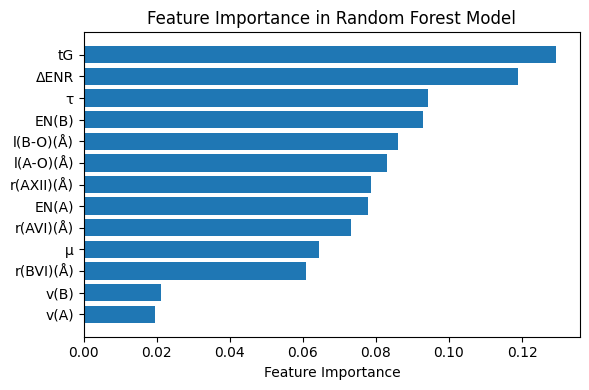

In [ ]:
plt.figure(figsize=(6, 4))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Weighted):", f1)


Accuracy: 0.821917808219178
Confusion Matrix:
 [[241  10   0   0]
 [ 44 105   4   1]
 [  2   6  11   0]
 [  7   3   1   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       251
           1       0.85      0.68      0.76       154
           2       0.69      0.58      0.63        19
           3       0.75      0.21      0.33        14

    accuracy                           0.82       438
   macro avg       0.78      0.61      0.65       438
weighted avg       0.82      0.82      0.81       438

F1 Score (Weighted): 0.8103328314206388


In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

f1 = f1_score(y_test, y_pred_xgb, average='macro')
print("XGBoost F1 Score (macro):", f1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:38:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost F1 Score (macro): 0.6645878432709469

Classification Report:
               precision    recall  f1-score   support

       cubic       0.81      0.95      0.88       251
orthorhombic       0.88      0.70      0.78       154
rhombohedral       0.75      0.63      0.69        19
  tetragonal       0.60      0.21      0.32        14

    accuracy                           0.83       438
   macro avg       0.76      0.62      0.66       438
weighted avg       0.83      0.83      0.82       438

XGBoost Accuracy: 0.8264840182648402


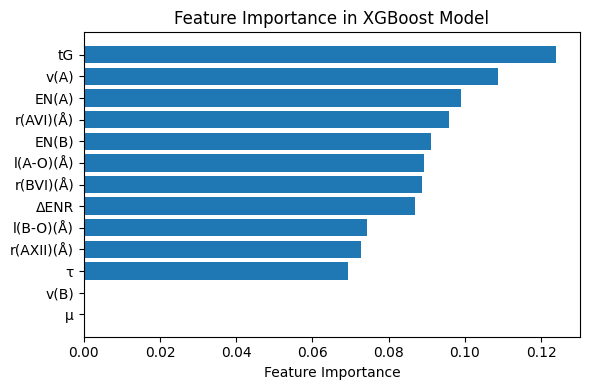

In [ ]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 4))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()